# Factor Analysis of Mixed Data

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore")

In [2]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scientisttools.decomposition import FAMD
from scientisttools.extractfactor import get_eig,get_famd_ind,get_famd_var,summaryFAMD
from scientisttools.pyplot import plotFAMD,plot_eigenvalues,plot_cosines,plot_contrib,plot_correlation_circle
from scientisttools.ggplot import fviz_famd_ind,fviz_famd_col,fviz_famd_mod,fviz_famd_var
from plydata import *

import os
os.chdir("d:/Bureau/PythonProject/packages/scientisttools/data/")

In [3]:
# Chargement des données
D = pd.read_excel("Tennis_Players_AFDM.xlsx",index_col=0)
display(D)

,Taille,Lateralite,MainsRevers,Titres,Finales,TitresGC,RolandGarros,BestClassDouble
Joueur,,,,,,,,
Agassi,180,droitier,deux,60,30,8,vainqueur,123
Becker,191,droitier,une,49,28,6,demi,6
Borg,180,droitier,deux,64,25,11,vainqueur,890
Connors,178,gaucher,deux,109,52,8,demi,370
Courier,185,droitier,deux,23,13,4,vainqueur,20
Edberg,187,droitier,une,41,36,6,finale,1
Kafelnikov,190,droitier,deux,26,20,2,vainqueur,4
Kuerten,190,droitier,une,20,9,3,vainqueur,38
Lendl,187,droitier,une,94,50,8,vainqueur,20


In [4]:
D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, Agassi to Nadal
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Taille           20 non-null     int64 
 1   Lateralite       20 non-null     object
 2   MainsRevers      20 non-null     object
 3   Titres           20 non-null     int64 
 4   Finales          20 non-null     int64 
 5   TitresGC         20 non-null     int64 
 6   RolandGarros     20 non-null     object
 7   BestClassDouble  20 non-null     int64 
dtypes: int64(5), object(3)
memory usage: 1.4+ KB


In [5]:
list(D.index[16:])

['Djokovic', 'Federer', 'Murray', 'Nadal']

In [6]:
#instaciation
afdm = FAMD(n_components=2,ind_sup=list(range(16,20)),quanti_sup=7)
#entraînement
afdm.fit(D)

FAMD(ind_sup=[16, 17, 18, 19], n_components=2, quanti_sup=7)

In [7]:
print(help(get_eig))

Help on function get_eig in module scientisttools.extractfactor:

get_eig(self) -> pandas.core.frame.DataFrame
    Extract the eigenvalues/variances of dimensions
    -----------------------------------------------
    
    Description
    -----------
    Eigenvalues correspond to the amount of the variation explained by each principal component.
    
    Parameters:
    -----------
    self : an object of class PCA, PartialPCA, CA, MCA, FAMD, MFA,CMDS, MFA, HMFA
    
    Returns
    -------
    eigenvalue, difference, variance percent and cumulative variance of percent

None


In [8]:
#valeurs propres
print(get_eig(afdm))

       eigenvalue  difference  proportion  cumulative
Dim.1    3.125964    1.701771   39.074556   39.074556
Dim.2    1.424193    0.286425   17.802418   56.876974
Dim.3    1.137768    0.285193   14.222105   71.099079
Dim.4    0.852575    0.125118   10.657188   81.756267
Dim.5    0.727457    0.286394    9.093217   90.849484
Dim.6    0.441063    0.199320    5.513292   96.362776
Dim.7    0.241744    0.192509    3.021796   99.384572
Dim.8    0.049234         NaN    0.615428  100.000000


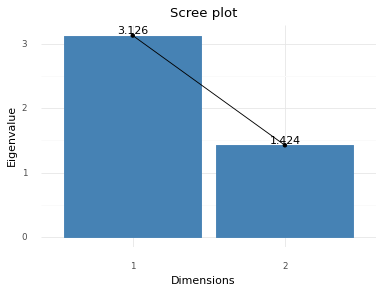

In [9]:
from scientisttools.ggplot import fviz_screeplot
p = fviz_screeplot(afdm,choice="eigenvalue",add_labels=True)
print(p)

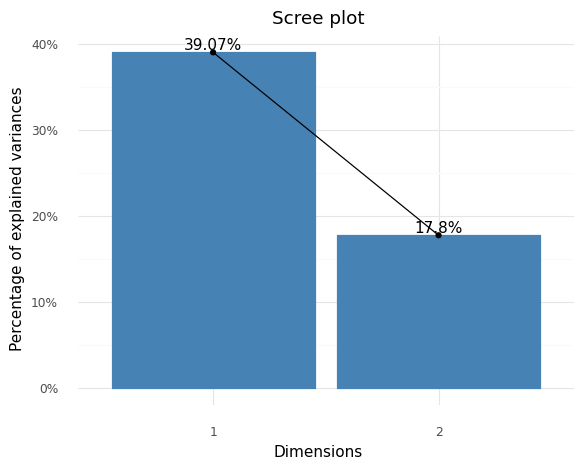

In [10]:
p = fviz_screeplot(afdm,choice="proportion",add_labels=True)
print(p)

In [11]:
print(help(summaryFAMD))

Help on function summaryFAMD in module scientisttools.extractfactor:

summaryFAMD(self, digits=3, nb_element=10, ncp=3, to_markdown=False, tablefmt='pipe', **kwargs)
    Printing summaries of factor analysis of miixed data model
    
    Parameters
    ----------
    self        :   an obect of class FAMD.
    digits      :   int, default=3. Number of decimal printed
    nb_element  :   int, default = 10. Number of element
    ncp         :   int, default = 3. Number of componennts
    to_markdown :   Print DataFrame in Markdown-friendly format.
    tablefmt    :   Table format. For more about tablefmt, see : https://pypi.org/project/tabulate/
    **kwargs    :   These parameters will be passed to tabulate.

None


In [12]:
#summary
summaryFAMD(afdm,to_markdown=True)

                     Factor Analysis of Mixed Data - Results                     

Importance of components
|                         |   Dim.1 |   Dim.2 |
|:------------------------|--------:|--------:|
| Variance                |   3.126 |   1.424 |
| Difference              |   1.702 |   0.286 |
| % of var.               |  39.075 |  17.802 |
| Cumulative of % of var. |  39.075 |  56.877 |

Individuals (the 10 first)

|            |   dist |   weight |   inertia |   Dim.1 |    ctr |   cos2 |   Dim.2 |    ctr |   cos2 |
|:-----------|-------:|---------:|----------:|--------:|-------:|-------:|--------:|-------:|-------:|
| Agassi     |  1.954 |    0.062 |     0.239 |   0.555 |  0.616 |  0.081 |  -1.73  | 13.129 |  0.783 |
| Becker     |  2.275 |    0.062 |     0.323 |  -0.835 |  1.395 |  0.135 |   1.241 |  6.763 |  0.298 |
| Borg       |  2.423 |    0.062 |     0.367 |   0.716 |  1.025 |  0.087 |  -1.875 | 15.431 |  0.599 |
| Connors    |  4.292 |    0.062 |     1.152 |   3.52  | 24.

In [13]:
print(help(get_famd_ind))

Help on function get_famd_ind in module scientisttools.extractfactor:

get_famd_ind(self, choice='ind') -> dict
    Extract the results for individuals
    -----------------------------------
    
    Description
    -----------
    Extract all the results (coordinates, squared cosine and contributions) for the individuals 
    from Factor Analysis of Mixed Date (FAMD) outputs.
    
    Parameters
    ----------
    self : an object of class FAMD
    
    choice : the element to subset from the output. Possible values are 
                - "ind" for active individuals, 
                - "ind_sup" for supplementary individuals
    
    Returns
    -------
    a dictionary of dataframes containing the results for the individuals, including :
    coord       : coordinates of indiiduals.
    cos2        : cos2 values representing the quality of representation on the factor map.
    contrib     : contributions of individuals to the principal components.
    
    Author(s)
    ---------
  

In [14]:
row = get_famd_ind(afdm)
row.keys()

dict_keys(['coord', 'cos2', 'contrib', 'dist', 'infos'])

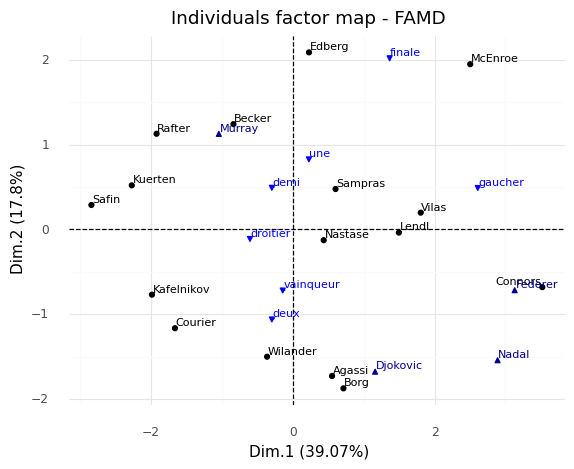

In [15]:
p = fviz_famd_ind(afdm,
                  color="black",
                  repel=True)
print(p)

In [16]:
row["contrib"].head(6)

,Dim.1,Dim.2
Agassi,0.615744,13.128774
Becker,1.395121,6.762551
Borg,1.024529,15.430990
Connors,24.774841,2.035412
Courier,5.510469,5.960298
Edberg,0.105857,19.137974


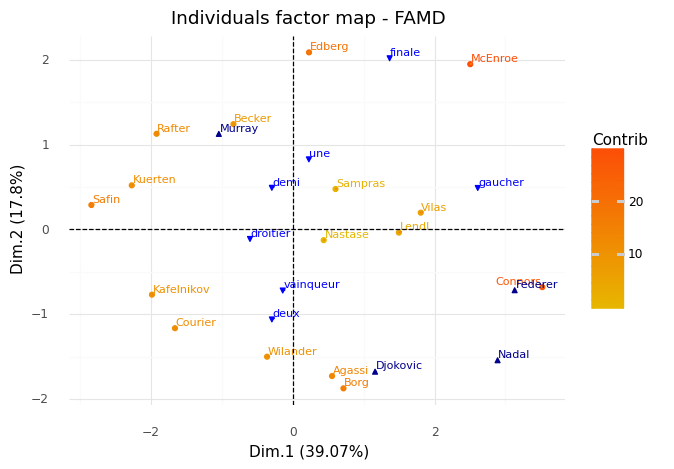

In [17]:
p = fviz_famd_ind(afdm,
                  color="contrib",
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

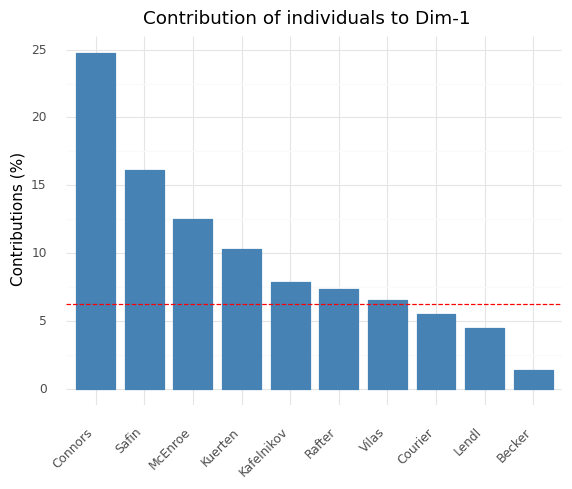

In [18]:
from scientisttools.ggplot import fviz_contrib
p = fviz_contrib(afdm,choice="ind",axis=0,top_contrib=10)
print(p)

In [19]:
row["cos2"].head(6)

,Dim.1,Dim.2
Agassi,0.080645,0.783403
Becker,0.134849,0.297804
Borg,0.087282,0.598936
Connors,0.672505,0.025172
Courier,0.546639,0.269380
Edberg,0.006011,0.495084


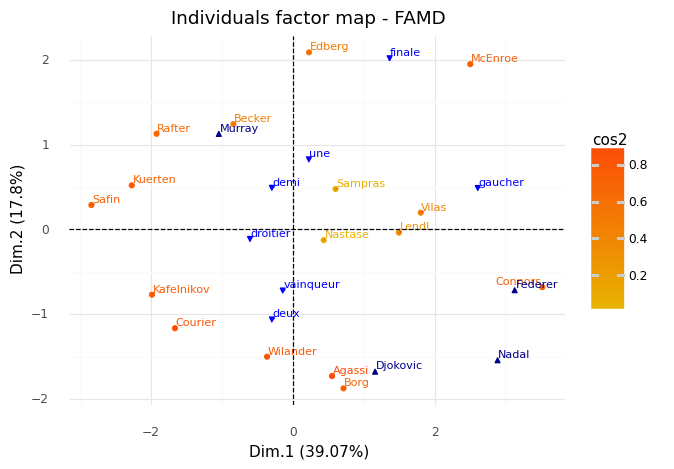

In [20]:
p = fviz_famd_ind(afdm,
                  color="cos2",
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

In [21]:
import numpy as np
np.random.seed(123)
my_cont_var = np.random.normal(size=row["coord"].shape[0])
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404  -0.67888615 -0.09470897
  1.49138963 -0.638902   -0.44398196 -0.43435128]


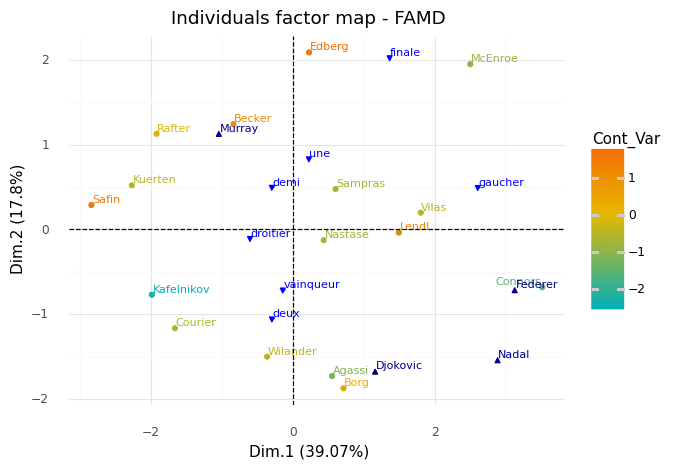

In [22]:
p = fviz_famd_ind(afdm,
                  color=my_cont_var,
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

In [23]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(row["coord"])
kmeans.labels_

array([0, 2, 0, 0, 1, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1])

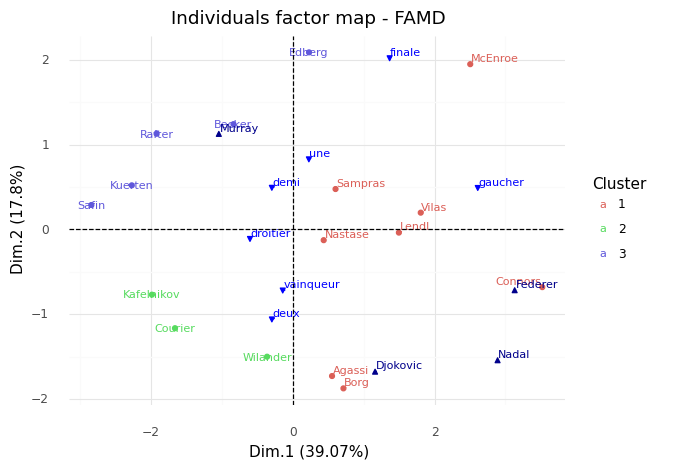

In [24]:
p = fviz_famd_ind(afdm,
                  color=kmeans,
                  gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
                  repel=True)
print(p)

## Variables

### Variables quantitatives

In [25]:
col = get_famd_var(afdm,choice="quanti_var")
col.keys()

dict_keys(['coord', 'contrib', 'cor', 'cos2', 'corr'])

In [26]:
col["coord"].head(6)

,Dim.1,Dim.2
Taille,-0.762939,0.339587
Titres,0.935937,-0.074027
Finales,0.863628,0.006709
TitresGC,0.557497,-0.181030


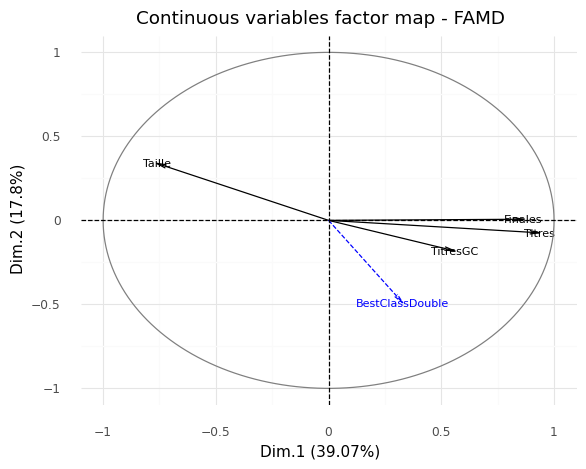

In [27]:
from scientisttools.ggplot import fviz_famd_col
p = fviz_famd_col(afdm,color="black")
print(p)

In [28]:
col["contrib"]

,Dim.1,Dim.2
Taille,18.620702,8.097177
Titres,28.022668,0.384778
Finales,23.859953,0.003161
TitresGC,9.942619,2.301077


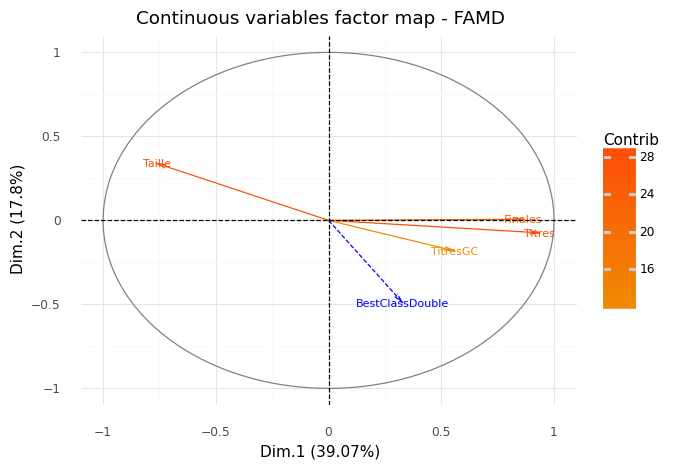

In [29]:
p = fviz_famd_col(afdm,
                  color="contrib")
print(p)

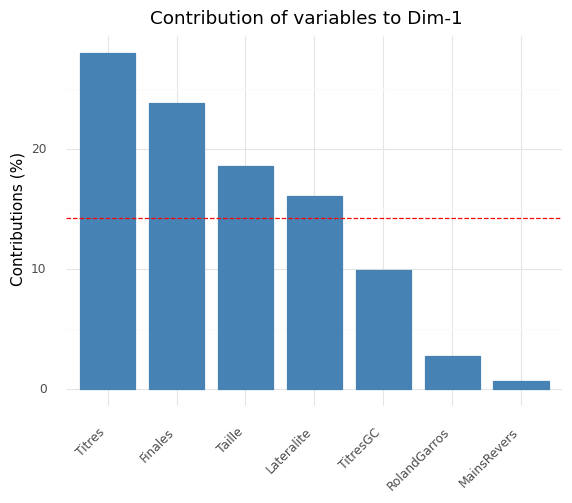

In [30]:
p = fviz_contrib(afdm,choice="var",axis=0)
print(p)

In [31]:
col["cos2"].head(6)

,Dim.1,Dim.2
Taille,0.582077,0.115319
Titres,0.875979,0.005480
Finales,0.745854,0.000045
TitresGC,0.310803,0.032772


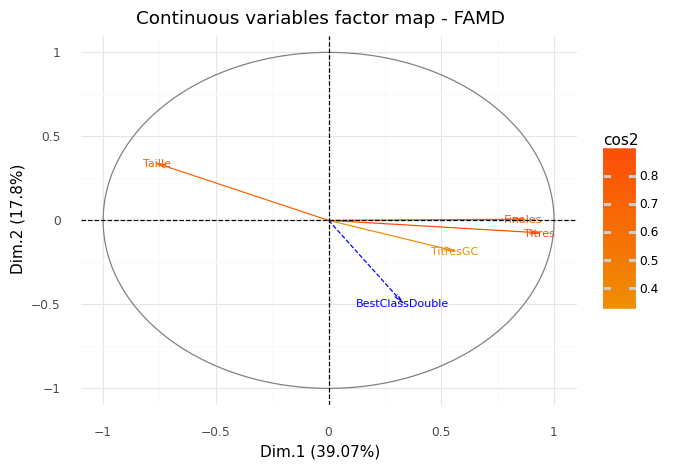

In [32]:
p = fviz_famd_col(afdm,
                  color="cos2")
print(p)

In [33]:
np.random.seed(123)
my_cont_var = np.random.normal(size=col["coord"].shape[0])
print(my_cont_var)

[-1.0856306   0.99734545  0.2829785  -1.50629471]


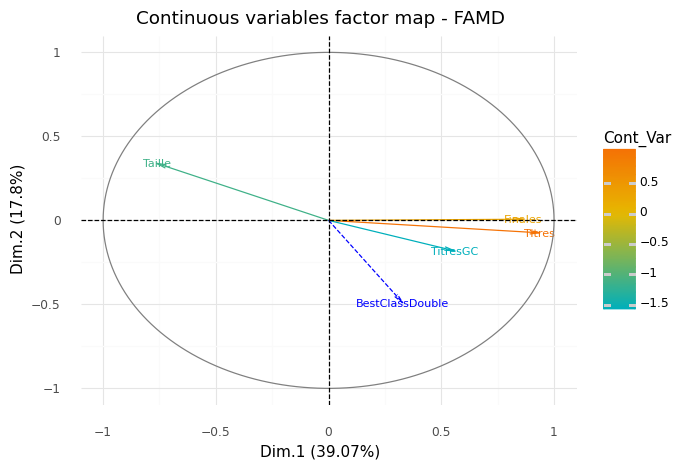

In [34]:
p = fviz_famd_col(afdm,
                  color=my_cont_var)
print(p)

In [35]:
kmeans = KMeans(n_clusters=3, random_state=np.random.seed(123), n_init="auto").fit(col["coord"])
kmeans.labels_

array([1, 0, 0, 2])

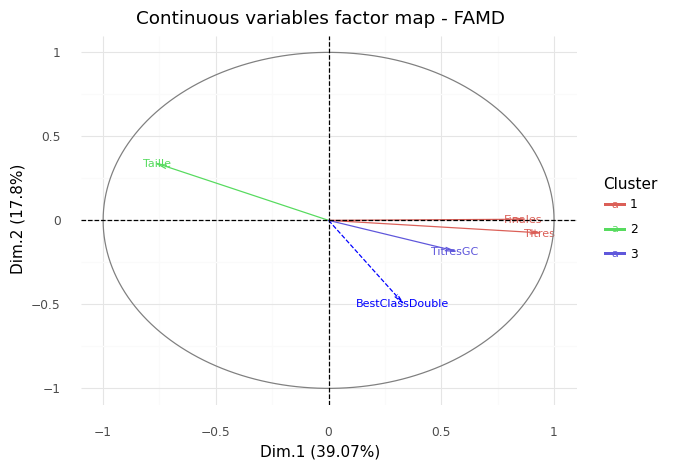

In [36]:
p = fviz_famd_col(afdm,
                  color=kmeans)
print(p)

### Categoricals variables - Modalites

In [37]:
mod = get_famd_var(afdm,choice="quali_var")
mod.keys()

dict_keys(['coord', 'contrib', 'cos2', 'infos', 'vtest'])

In [38]:
mod["coord"]

,Dim.1,Dim.2
droitier,-0.602308,-0.112717
gaucher,2.610001,0.488441
deux,-0.293516,-1.062163
une,0.228291,0.826127
demi,-0.293940,0.490470
finale,1.367098,2.018646
vainqueur,-0.140499,-0.721071


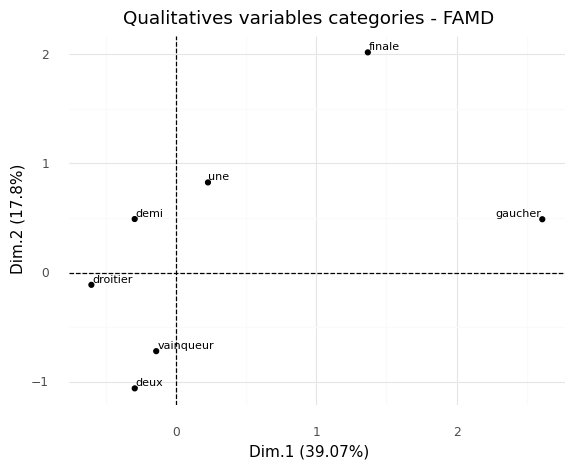

In [39]:
p = fviz_famd_mod(afdm,color="black",repel=True)
print(p)

In [40]:
mod["contrib"]

,Dim.1,Dim.2
droitier,3.016424,0.508939
gaucher,13.071172,2.205404
deux,0.385722,24.334510
une,0.300006,18.926841
demi,0.276312,3.706272
finale,2.390788,25.112639
vainqueur,0.113633,14.419200


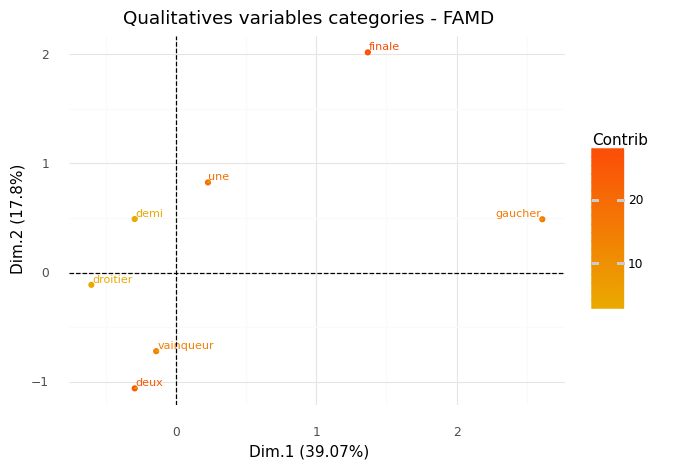

In [41]:
p = fviz_famd_mod(afdm,
                  color="contrib",
                  repel=True)
print(p)

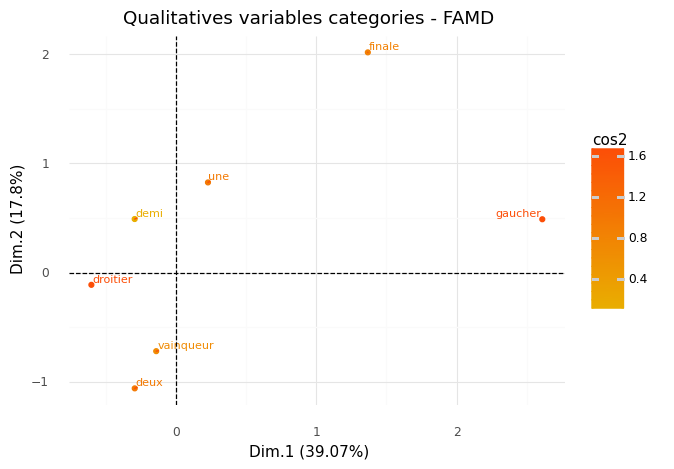

In [42]:
p = fviz_famd_mod(afdm,
                  color="cos2",
                  repel=True)
print(p)

### Variables - Overall

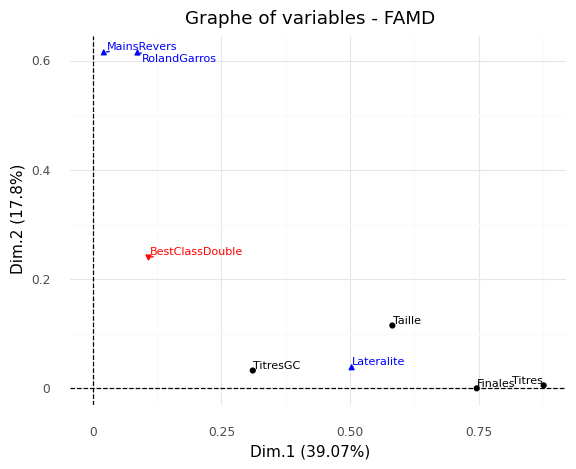

In [43]:
p = fviz_famd_var(afdm,repel=True)
print(p)

In [44]:
np.random.seed(123)
my_cont_var = np.random.normal(size=7)
my_cont_var

array([-1.0856306 ,  0.99734545,  0.2829785 , -1.50629471, -0.57860025,
        1.65143654, -2.42667924])

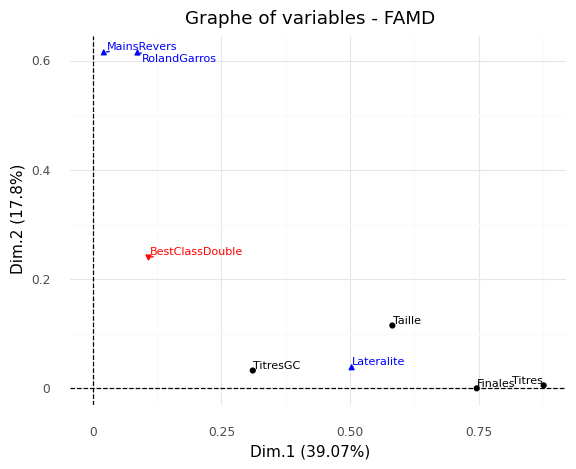

In [45]:
p = fviz_famd_var(afdm,repel=True)
print(p)

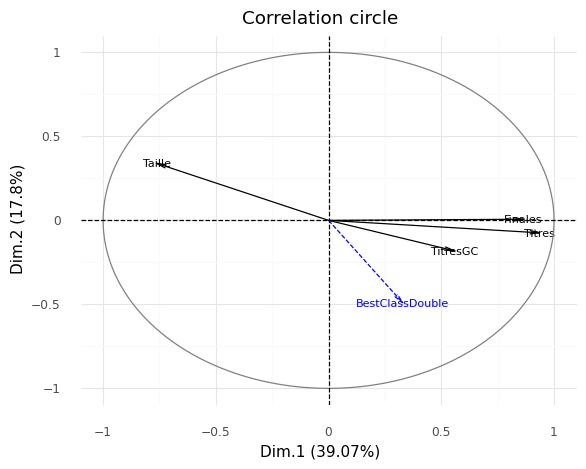

In [46]:
from scientisttools.ggplot import fviz_corrcircle
p = fviz_corrcircle(afdm)
print(p)